In [22]:
install.packages('devtools', repos='http://cran.us.r-project.org')
install.packages('jsonlite', repos='http://cran.us.r-project.org')
install.packages('reshape2', repos='http://cran.us.r-project.org')
install.packages('data.table', repos='http://cran.us.r-project.org')
install.packages('WriteXLS', repos='http://cran.us.r-project.org')

Installing package into ‘/home/claire/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
Installing package into ‘/home/claire/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
Installing package into ‘/home/claire/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
Installing package into ‘/home/claire/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
Installing package into ‘/home/claire/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


In [23]:
require(devtools)
install_github('jbryer/likert')
require(jsonlite)
require(likert)
require(reshape2)
library(data.table)
library(WriteXLS)

Skipping install of 'likert' from a github remote, the SHA1 (54a6c003) has not changed since last install.
  Use `force = TRUE` to force installation


In [81]:
n <-fromJSON('~/Documents/jobs/milieu/milieu-opinion-extraction-engine/analysis-noumea-0822.json')

In [82]:
# adds an seq. column and reshapes the data
n$id <- seq.int(nrow(n))
m <-melt(n, id.vars = c("participant_id", "id", "text", "question_body", "neighbourhood", "age", "email", "lives_in_noumea", "months_lived_in_noumea", "enable_receive_emails"))
d <-dcast(m, participant_id + age + neighbourhood + lives_in_noumea + months_lived_in_noumea + email + enable_receive_emails ~ value, value.var = "text")
head(d)

participant_id,age,neighbourhood,lives_in_noumea,months_lived_in_noumea,email,enable_receive_emails,q1-1,q1-10,q1-11,⋯,q4-9,q5-1,q5-2,q5-3,q5-4,q5-5,q5-6,q5-7,q5-8,q5-9
26,NA,NA,FALSE,NA,,FALSE,3,3,3,⋯,3,3,3,3,3,3,3,3,3,3
27,12,NA,FALSE,NA,test test,FALSE,3,3,3,⋯,3,3,3,3,3,3,3,3,3,3
28,12,NA,FALSE,NA,test test,FALSE,3,3,3,⋯,3,3,3,3,3,3,3,3,3,3
29,26,pk6,TRUE,2 ans,jonathan.rebouillon@gmail.com,TRUE,5,4,5,⋯,4,5,1,3,2,5,5,4,5,5
30,30,Magenta,TRUE,30,Olivia.kurt@gmail.com,FALSE,3,3,3,⋯,5,3,3,3,3,4,4,4,4,4
31,30,Magenta,TRUE,30,Olivia.kurt@gmail.com,FALSE,3,3,3,⋯,5,3,3,3,3,4,4,4,4,4


In [83]:
# this node discards all rows that are just '3' aka nothing changed in survey
# start = which( colnames(d)=="q1-1")
# end = which( colnames(d)=="q5-9")
# likqs <- d[, c(start:end)]

# temporarily turn 3s into NAs
d[is.na(d)] <- "undefined"
d[d == 3] <- NA

# keep rows with less than 56 NAs
d <- d[rowSums(is.na(d)) < 56,]

# change it all back
d[is.na(d)] <- 3
d[d == "undefined"] <- NA
d

,participant_id,age,neighbourhood,lives_in_noumea,months_lived_in_noumea,email,enable_receive_emails,q1-1,q1-10,q1-11,⋯,q4-9,q5-1,q5-2,q5-3,q5-4,q5-5,q5-6,q5-7,q5-8,q5-9
4,29,26,pk6,TRUE,2 ans,jonathan.rebouillon@gmail.com,TRUE,5,4,5,⋯,4,5,1,3,2,5,5,4,5,5
5,30,30,Magenta,TRUE,30,Olivia.kurt@gmail.com,FALSE,3,3,3,⋯,5,3,3,3,3,4,4,4,4,4
6,31,30,Magenta,TRUE,30,Olivia.kurt@gmail.com,FALSE,3,3,3,⋯,5,3,3,3,3,4,4,4,4,4
7,32,32,Trianon,TRUE,22,ornc44@gmail.com,FALSE,1,1,1,⋯,5,3,1,1,1,1,1,1,5,3
8,33,28,NA,FALSE,NA,e.launay@live.fr,TRUE,3,3,4,⋯,5,3,3,4,3,3,3,1,5,5
9,34,26,Baie des citrons,TRUE,26 ans,haguet.megane@gmail.com,TRUE,4,3,4,⋯,4,3,3,4,2,3,3,3,4,4
10,35,29,Magenta,TRUE,4,,FALSE,3,3,3,⋯,3,1,3,3,3,4,3,3,3,4
11,36,46,Tuband,TRUE,10,fgambarotto@yahoo.fr,FALSE,3,3,3,⋯,3,4,3,3,4,4,3,3,3,3
12,37,46,Tuband,TRUE,10,fgambarotto@yahoo.fr,TRUE,3,3,3,⋯,3,4,3,3,4,4,3,3,3,3
13,38,37,Trianon,TRUE,3 ans,marie.brenon@lagoon.nc,TRUE,5,5,4,⋯,3,5,4,4,4,3,3,5,4,3


In [84]:
# remove duplicate rows
d <- unique( d[ , 2:ncol(d) ] )
# TODO: fix this later
# adds id row back in
d$id <- seq.int(nrow(d))
d <- d[,c(ncol(d),1:(ncol(d)-1))]
nrow(d)
d

[1] 292

,id,age,neighbourhood,lives_in_noumea,months_lived_in_noumea,email,enable_receive_emails,q1-1,q1-10,q1-11,⋯,q4-9,q5-1,q5-2,q5-3,q5-4,q5-5,q5-6,q5-7,q5-8,q5-9
4,1,26,pk6,TRUE,2 ans,jonathan.rebouillon@gmail.com,TRUE,5,4,5,⋯,4,5,1,3,2,5,5,4,5,5
5,2,30,Magenta,TRUE,30,Olivia.kurt@gmail.com,FALSE,3,3,3,⋯,5,3,3,3,3,4,4,4,4,4
7,3,32,Trianon,TRUE,22,ornc44@gmail.com,FALSE,1,1,1,⋯,5,3,1,1,1,1,1,1,5,3
8,4,28,NA,FALSE,NA,e.launay@live.fr,TRUE,3,3,4,⋯,5,3,3,4,3,3,3,1,5,5
9,5,26,Baie des citrons,TRUE,26 ans,haguet.megane@gmail.com,TRUE,4,3,4,⋯,4,3,3,4,2,3,3,3,4,4
10,6,29,Magenta,TRUE,4,,FALSE,3,3,3,⋯,3,1,3,3,3,4,3,3,3,4
11,7,46,Tuband,TRUE,10,fgambarotto@yahoo.fr,FALSE,3,3,3,⋯,3,4,3,3,4,4,3,3,3,3
12,8,46,Tuband,TRUE,10,fgambarotto@yahoo.fr,TRUE,3,3,3,⋯,3,4,3,3,4,4,3,3,3,3
13,9,37,Trianon,TRUE,3 ans,marie.brenon@lagoon.nc,TRUE,5,5,4,⋯,3,5,4,4,4,3,3,5,4,3
15,10,29,faubourg Blanchot,TRUE,1,marie.c.22@hotmail.fr,TRUE,3,3,3,⋯,5,4,3,3,3,3,3,4,4,4


In [86]:
# export to csv
WriteXLS(d, "noumea-aug22.xls")

In [90]:
# nb <- data.frame(d$neighbourhood)
# nb

d.neighbourhood
pk6
Magenta
Trianon
NA
Baie des citrons
Magenta
Tuband
Tuband
Trianon
faubourg Blanchot


In [58]:
# converts all columns from character to factor
d[sapply(d, is.character)] <- lapply(d[sapply(d, is.character)], 
                                       as.factor)
sapply(d, class)

participant_id                    age          neighbourhood 
             "integer"               "factor"               "factor" 
       lives_in_noumea months_lived_in_noumea                  email 
             "logical"               "factor"               "factor" 
 enable_receive_emails                   q1-1                  q1-10 
             "logical"               "factor"               "factor" 
                 q1-11                   q1-2                   q1-3 
              "factor"               "factor"               "factor" 
                  q1-4                   q1-5                   q1-6 
              "factor"               "factor"               "factor" 
                  q1-7                   q1-8                   q1-9 
              "factor"               "factor"               "factor" 
                  q2-1                  q2-10                  q2-11 
              "factor"               "factor"               "factor" 
                 q2-12                  q2-13                  q2-14 
              "factor"               "factor"               "factor" 
                  q2-2                   q2-3                   q2-4 
              "factor"               "factor"               "factor" 
                  q2-5                   q2-6                   q2-7 
              "factor"               "factor"               "factor" 
                  q2-8                   q2-9                   q3-1 
              "factor"               "factor"               "factor" 
                 q3-10                   q3-2                   q3-3 
              "factor"               "factor"               "factor" 
                  q3-4                   q3-5                   q3-6 
              "factor"               "factor"               "factor" 
                  q3-7                   q3-8                   q3-9 
              "factor"               "factor"               "factor" 
                  q4-1                  q4-10                  q4-11 
              "factor"               "factor"               "factor" 
                 q4-12                  q4-13                   q4-2 
              "factor"               "factor"               "factor" 
                  q4-3                   q4-4                   q4-5 
              "factor"               "factor"               "factor" 
                  q4-6                   q4-7                   q4-8 
              "factor"               "factor"               "factor" 
                  q4-9                   q5-1                   q5-2 
              "factor"               "factor"               "factor" 
                  q5-3                   q5-4                   q5-5 
              "factor"               "factor"               "factor" 
                  q5-6                   q5-7                   q5-8 
              "factor"               "factor"               "factor" 
                  q5-9 
              "factor"

In [15]:
setnames(d, old = c("q1-1", "q1-2", "q1-3", "q1-4", "q1-5", "q1-6", "q1-7", "q1-8", "q1-9", "q1-10", "q1-11"), new = c('Étages: espaces educatifs', 'Bureaux co-working (bureaux partagés)', 'Commerces', 'Espace à usage pluriel', 'Friche artistique-studios', 'Espace recherche scientifique', 'Café', 'Bureaux', 'Espaces verts et jardins potagers', 'Bâtiments fermés au public pour réhabilitation', 'Maison du projet (accueil/ exposition)'))
myvars <- c('Étages: espaces educatifs', 'Bureaux co-working (bureaux partagés)', 'Commerces', 'Espace à usage pluriel', 'Friche artistique-studios')
# , 'Espace recherche scientifique', 'Café', 'Bureaux', 'Espaces verts et jardins potagers', 'Bâtiments fermés au public pour réhabilitation', 'Maison du projet (accueil/ exposition)'
newdata <- d[myvars]
lik <- likert(newdata)
summary(lik)

,Item,low,neutral,high,mean,sd
1,Étages: espaces educatifs,6.293706,40.55944,53.14685,3.608392,0.8907711
5,Friche artistique-studios,13.986014,33.21678,52.79720,3.576923,1.0951371
3,Commerces,23.076923,33.21678,43.70629,3.272727,1.1312581
2,Bureaux co-working (bureaux partagés),17.832168,39.51049,42.65734,3.332168,1.1104670
4,Espace à usage pluriel,8.391608,53.49650,38.11189,3.346154,0.8265990


Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.


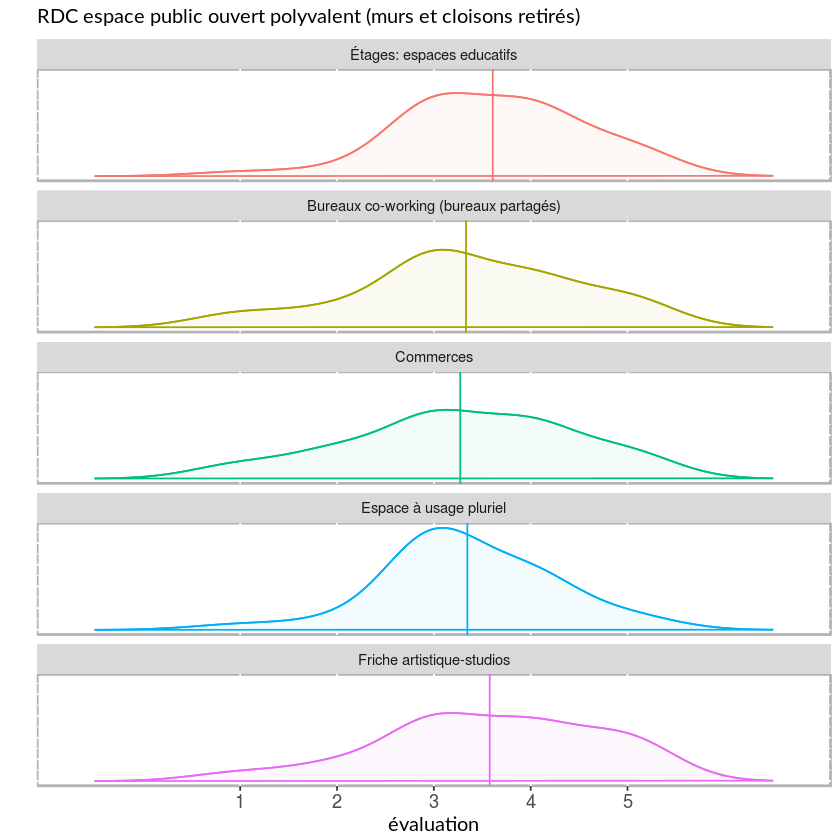

In [16]:
plot(lik, type = "density") + scale_x_discrete(limits=c("1","2","3","4","5")) + 
ggtitle("RDC espace public ouvert polyvalent (murs et cloisons retirés)")  + 
  labs(x="évaluation") + theme(plot.title = element_text(family = "Lato", size=12, hjust=0)) + 
  theme(axis.title = element_text(family = "Lato", size=12)) + theme(axis.text.x = element_text(
                           size=11))

In [26]:
# todo -- how to save graphs
ggsave(filename="myPlot.png", plot=lik)

Saving 6.67 x 6.67 in image


ERROR: Error in UseMethod("grid.draw"): no applicable method for 'grid.draw' applied to an object of class "likert"
